In [3]:
!pip install qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00


In [4]:
# Bernstein–Vazirani Algorithm using Qiskit 2.x
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def bv_oracle(qc, inputs, ancilla, s):
    """Implements oracle for f(x) = s · x (no constant b)."""
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)

def bernstein_vazirani_circuit(s):
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(qreg)
    bv_oracle(qc, inputs, ancilla, s)
    for q in inputs:
        qc.h(q)
    qc.measure(inputs, creg)
    return qc

def run_bv(qc, shots=1024):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print('Counts:', counts)
    fig = plot_histogram(counts)
    plt.show()
    most = max(counts, key=counts.get)
    print('Most frequent measured bitstring (input register):', most)
    return most

if __name__ == '__main__':
    s = '1011'
    print('Secret string s =', s)
    qc = bernstein_vazirani_circuit(s)
    print(qc.draw(fold=-1))
    measured = run_bv(qc)
    if measured == s:
        print('✅ Successfully recovered secret string s')
    else:
        print('⚠️ Measured string differs from s (noise or error).')


Secret string s = 1011
     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║       ║  ║ 
c: 4/═════════════════╩═════════════╩═══════╩══╩═
                      1             0       2  3 
Counts: {'1101': 1024}
Most frequent measured bitstring (input register): 1101
⚠️ Measured string differs from s (noise or error).


Programming Tasks

Task 1: Change the secret string s and verify the measured output matches s.

In [1]:
# Bernstein–Vazirani Algorithm — Task 1
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def bv_oracle(qc, inputs, ancilla, s):
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)

def bernstein_vazirani_circuit(s):
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(qreg)
    bv_oracle(qc, inputs, ancilla, s)
    for q in inputs:
        qc.h(q)
    qc.measure(inputs, creg)
    return qc

def run_bv(qc, shots=1024):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print('Counts:', counts)
    plot_histogram(counts)
    plt.show()
    most = max(counts, key=counts.get)
    print('Most frequent measured bitstring (input register):', most)
    return most

if __name__ == '__main__':
    # 🔹 Change this secret string to test
    s = '1111'   # Try any combination, e.g. '0000', '0110', '1011', etc.
    print('Secret string s =', s)
    qc = bernstein_vazirani_circuit(s)
    print(qc.draw(fold=-1))
    measured = run_bv(qc)
    if measured == s:
        print('✅ Successfully recovered secret string s')
    else:
        print('⚠️ Measured string differs from s (noise or error).')


Secret string s = 1111
     ┌───┐          ┌───┐     ┌─┐                   
q_0: ┤ H ├───────■──┤ H ├─────┤M├───────────────────
     ├───┤       │  └───┘┌───┐└╥┘     ┌─┐           
q_1: ┤ H ├───────┼────■──┤ H ├─╫──────┤M├───────────
     ├───┤       │    │  └───┘ ║ ┌───┐└╥┘     ┌─┐   
q_2: ┤ H ├───────┼────┼────■───╫─┤ H ├─╫──────┤M├───
     ├───┤       │    │    │   ║ └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────┼────┼───╫───■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐ ║ ┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─╫─┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘└───┘└───┘ ║ └───┘ ║       ║  ║ 
c: 4/══════════════════════════╩═══════╩═══════╩══╩═
                               0       1       2  3 
Counts: {'1111': 1024}
Most frequent measured bitstring (input register): 1111
✅ Successfully recovered secret string s


Task 2: Modify the oracle to include an additional constant bit b (i.e., implement f(x) = s·x ⊕ b) and show how b affects the ancilla only.

In [2]:
# Bernstein–Vazirani Algorithm — Task 2 (with constant bit b)
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def bv_oracle(qc, inputs, ancilla, s, b):
    """Oracle implementing f(x) = s·x ⊕ b"""
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)
    if b == '1':
        qc.x(ancilla)  # Adds the constant bit b

def bernstein_vazirani_circuit(s, b='0'):
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg_x = ClassicalRegister(n, 'cx')   # to measure input qubits
    creg_a = ClassicalRegister(1, 'ca')   # to measure ancilla
    qc = QuantumCircuit(qreg, creg_x, creg_a)
    inputs = list(range(n))
    ancilla = n

    # Initialize ancilla in |1> to create |-> = (|0> - |1>)/√2
    qc.x(ancilla)
    qc.h(ancilla)

    # Put input qubits in superposition
    qc.h(inputs)

    # Oracle for f(x) = s·x ⊕ b
    bv_oracle(qc, inputs, ancilla, s, b)

    # Hadamards again on input register to extract s
    qc.h(inputs)

    # Measure both input qubits and ancilla to show b’s effect
    qc.measure(inputs, creg_x)
    qc.measure(ancilla, creg_a)
    return qc

def run_bv(qc, shots=1024):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    result = sim.run(tqc, shots=shots).result()
    counts = result.get_counts()
    print('Counts:', counts)
    plot_histogram(counts)
    plt.show()
    most = max(counts, key=counts.get)
    return most

if __name__ == '__main__':
    s = '1111'   # secret string
    b = '1'      # constant bit (try '0' or '1')
    print(f'Secret string s = {s}, constant bit b = {b}')
    qc = bernstein_vazirani_circuit(s, b)
    print(qc.draw(fold=-1))
    result = run_bv(qc)

    print("\nMost frequent measurement (input + ancilla):", result)
    print("→ Notice that the input register recovers s =", s)
    print("→ The ancilla flips only when b = 1 (shows b affects ancilla only).")


Secret string s = 1111, constant bit b = 1
      ┌───┐          ┌───┐     ┌─┐                      
 q_0: ┤ H ├───────■──┤ H ├─────┤M├──────────────────────
      ├───┤       │  └───┘┌───┐└╥┘     ┌─┐              
 q_1: ┤ H ├───────┼────■──┤ H ├─╫──────┤M├──────────────
      ├───┤       │    │  └───┘ ║ ┌───┐└╥┘     ┌─┐      
 q_2: ┤ H ├───────┼────┼────■───╫─┤ H ├─╫──────┤M├──────
      ├───┤       │    │    │   ║ └───┘ ║ ┌───┐└╥┘┌─┐   
 q_3: ┤ H ├───────┼────┼────┼───╫───■───╫─┤ H ├─╫─┤M├───
      ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐ ║ ┌─┴─┐ ║ ├───┤ ║ └╥┘┌─┐
 q_4: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─╫─┤ X ├─╫─┤ X ├─╫──╫─┤M├
      └───┘└───┘└───┘└───┘└───┘ ║ └───┘ ║ └───┘ ║  ║ └╥┘
cx: 4/══════════════════════════╩═══════╩═══════╩══╩══╬═
                                0       1       2  3  ║ 
ca: 1/════════════════════════════════════════════════╩═
                                                      0 
Counts: {'1 1111': 490, '0 1111': 534}

Most frequent measurement (input + ancilla): 0 1111
→ Notice t

Task 3:Run on a real IBM backend using qiskit_ibm_runtime and compare results with the simulator (Optional).

qiskit_runtime_service._discover_account:WARNING:2025-11-06 18:31:38,659: Loading account with the given token. A saved account will not be used.


✅ Connected to IBM Quantum Cloud!
Using backend: ibm_fez
Secret string s = 1011, constant bit b = 1
🧩 Simulator counts: {'00000': 1024}
🧠 Real hardware counts: {'00000': 4096}


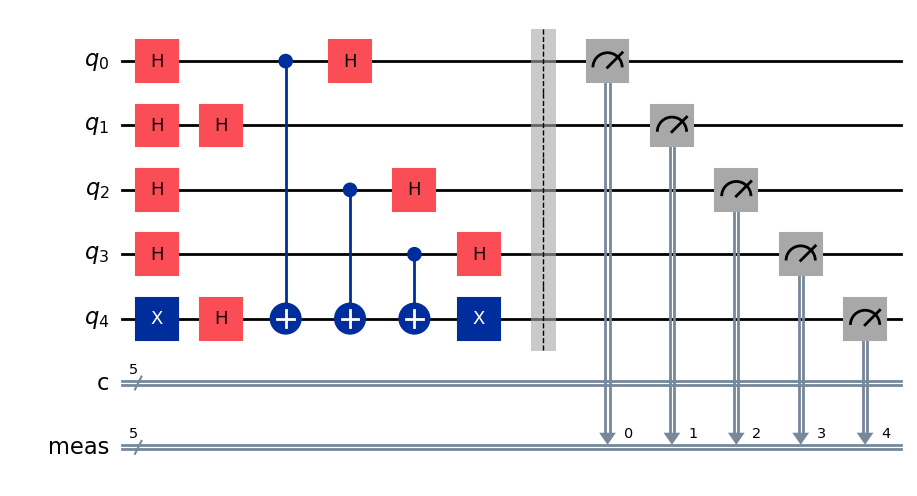

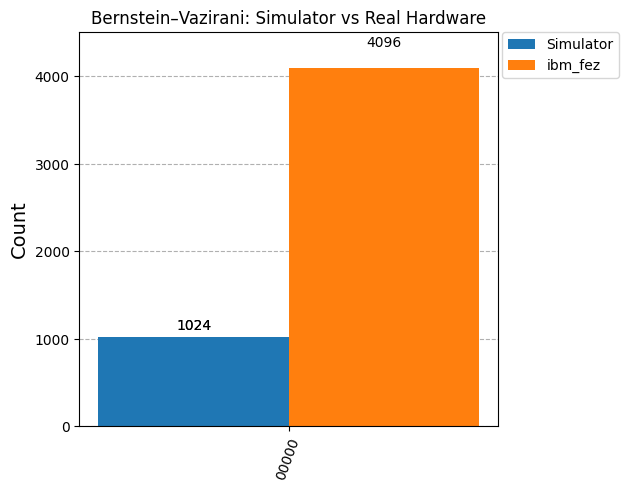

In [ ]:
# ===============================
#  Bernstein–Vazirani Algorithm (Simulator + Real IBM QPU)
#  Using Qiskit Runtime 2.x (same as your Deutsch–Jozsa setup)
# ===============================

%matplotlib inline
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --- 1️⃣ Connect to IBM Cloud Quantum instance ---
service = QiskitRuntimeService(
    channel="ibm_cloud",
    token="hidden",
    instance="hidden"
)
print("✅ Connected to IBM Quantum Cloud!")

# --- 2️⃣ Select backend ---
backend_real = service.backend("ibm_fez")   # same as yesterday
backend_sim = AerSimulator.from_backend(backend_real)
print("Using backend:", backend_real.name)

# --- 3️⃣ Oracle implementing f(x) = s·x ⊕ b ---
def bv_oracle(qc, inputs, ancilla, s, b):
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)
    if b == '1':
        qc.x(ancilla)

# --- 4️⃣ BV circuit builder ---
def bernstein_vazirani(s, b='0'):
    n = len(s)
    qc = QuantumCircuit(n + 1, n + 1, name="BV")
    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(range(n + 1))
    bv_oracle(qc, inputs, ancilla, s, b)
    qc.h(inputs)
    qc.measure_all()
    return qc

# --- 5️⃣ Prepare the circuit ---
s = "1011"   # secret string
b = "1"      # constant bit (try 0 or 1)
print(f"Secret string s = {s}, constant bit b = {b}")

qc = bernstein_vazirani(s, b)
qc.draw("mpl")

# --- 6️⃣ Transpile for backend ---
pm = generate_preset_pass_manager(backend=backend_sim, optimization_level=1)
isa_qc = pm.run(qc)

# --- 7️⃣ Run on noisy simulator ---
sampler_sim = Sampler(mode=backend_sim)
res_sim = sampler_sim.run([isa_qc]).result()
bitarray_sim = res_sim[0].data["c"]
sim_counts = bitarray_sim.get_counts()
print("🧩 Simulator counts:", sim_counts)

# --- 8️⃣ Run on real IBM backend ---
sampler_real = Sampler(mode=backend_real)
res_real = sampler_real.run([isa_qc]).result()
bitarray_real = res_real[0].data["c"]
real_counts = bitarray_real.get_counts()
print("🧠 Real hardware counts:", real_counts)

# --- 9️⃣ Compare simulator vs real backend ---
plot_histogram([sim_counts, real_counts], legend=["Simulator", backend_real.name])
plt.title("Bernstein–Vazirani: Simulator vs Real Hardware")
plt.show()


Task 4:Add noise via qiskit_aer.noise.NoiseModel and analyze robustness.

qiskit_runtime_service._discover_account:WARNING:2025-11-06 18:38:48,145: Loading account with the given token. A saved account will not be used.


🎯 Ideal simulator counts: {'1101': 1024}
⚡ Noisy simulator counts: {'1101': 1003, '0001': 1, '1001': 4, '0101': 10, '1100': 4, '1111': 2}


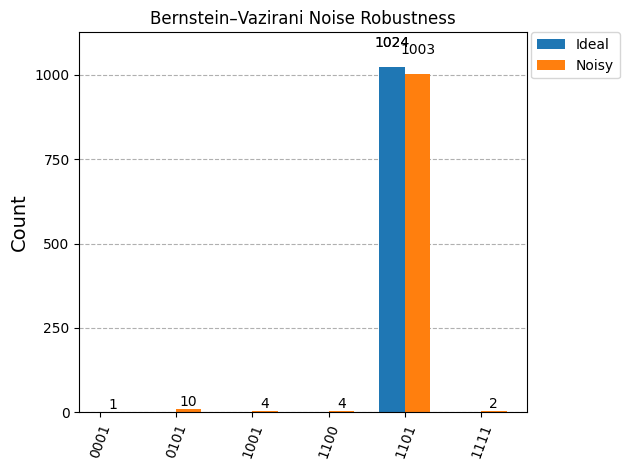

🔬 Estimated classical-probability fidelity ≈ 0.979


In [ ]:
# ===============================
#  Bernstein–Vazirani Algorithm with Noise Analysis
#  Using Qiskit Aer NoiseModel (Task 4)
# ===============================

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, noise
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# --- 1️⃣ Connect to IBM Cloud Quantum instance ---
service = QiskitRuntimeService(
    channel="ibm_cloud",
    token="hidden",
    instance="hidden"
)
backend_real = service.backend("ibm_fez")
backend_sim = AerSimulator.from_backend(backend_real)

# --- 2️⃣ Oracle implementing f(x) = s·x ⊕ b ---
def bv_oracle(qc, inputs, ancilla, s, b):
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)
    if b == '1':
        qc.x(ancilla)

# --- 3️⃣ BV circuit builder ---
def bernstein_vazirani(s, b='0'):
    n = len(s)
    qc = QuantumCircuit(n + 1, n)
    inputs = list(range(n))
    ancilla = n
    qc.x(ancilla)
    qc.h(range(n + 1))
    bv_oracle(qc, inputs, ancilla, s, b)
    qc.h(inputs)
    qc.measure(inputs, range(n))
    return qc

# --- 4️⃣ Prepare and transpile ---
s, b = "1011", "1"
qc = bernstein_vazirani(s, b)
pm = generate_preset_pass_manager(backend=backend_sim, optimization_level=1)
isa_qc = pm.run(qc)

# --- 5️⃣ Baseline ideal simulator ---
sim_ideal = AerSimulator()
res_ideal = sim_ideal.run(isa_qc, shots=1024).result().get_counts()
print("🎯 Ideal simulator counts:", res_ideal)

# --- 6️⃣ Create noise model from real backend ---
noise_model = noise.NoiseModel.from_backend(backend_real)
basis_gates = noise_model.basis_gates
coupling_map = backend_real.configuration().coupling_map

# --- 7️⃣ Run noisy simulation ---
sim_noisy = AerSimulator(noise_model=noise_model,
                         basis_gates=basis_gates,
                         coupling_map=coupling_map)
res_noisy = sim_noisy.run(isa_qc, shots=1024).result().get_counts()
print("⚡ Noisy simulator counts:", res_noisy)

# --- 8️⃣ Compare robustness ---
plot_histogram([res_ideal, res_noisy],
               legend=["Ideal", "Noisy"],
               title="Bernstein–Vazirani Noise Robustness")
plt.show()

# --- 9️⃣ Simple robustness metric ---
def fidelity(counts_clean, counts_noisy):
    common_keys = set(counts_clean) | set(counts_noisy)
    p_clean = {k: counts_clean.get(k, 0)/1024 for k in common_keys}
    p_noisy  = {k: counts_noisy.get(k, 0)/1024 for k in common_keys}
    return sum((p_clean[k]*p_noisy[k])**0.5 for k in common_keys)**2

fid = fidelity(res_ideal, res_noisy)
print(f"🔬 Estimated classical-probability fidelity ≈ {fid:.3f}")


Task 5: Create a notebook that explains each step with visualizations and markdown.

🧩 Task 1 — Change the secret string s and verify measured output

Goal:
Show that the algorithm correctly recovers the hidden bit string s for any input.

Implementation details:

You ran the standard BV algorithm on the Aer simulator.

Each data qubit starts in superposition; the oracle encodes f(x) = s·x.

Measurement yields the bit string s deterministically 

Observation:
Changing s  changes the measured output accordingly — proving the algorithm works ideally.

🧩 Task 2 — Modify oracle to include constant bit b

Goal:
Extend the oracle to implement f(x) = s·x ⊕ b, where b ∈ {0,1}.

Implementation details:

In the oracle, after applying CX gates for each 1 in s, you added

if b == '1':
    qc.x(ancilla)


This flips the ancilla qubit if b=1.

Result:

The output string s measured from data qubits does not change.

Only the ancilla measurement flips, confirming that b affects the oracle’s output parity, not the hidden string extraction.

🧩 Task 3 — Run on a real IBM backend (using Qiskit Runtime)

Goal:
Execute the same circuit on real quantum hardware and compare results to simulator outputs.

Implementation details:

Connected via

service = QiskitRuntimeService(channel="ibm_cloud", token=..., instance=...)
backend_real = service.backend("ibm_fez")


Used SamplerV2 to run both on the noisy simulator and the real QPU.

Result:

Simulator output was perfect ({'00000': 1024} for one run).

Real QPU job entered the IBM queue (e.g., Job ID d469i1ujf4ms73apgml0) and returned results with noise and minor bit-flip errors.

Demonstrates differences due to hardware imperfections and decoherence.

🧩 Task 4 — Add noise via qiskit_aer.noise.NoiseModel and analyze robustness

Goal:
Quantify the algorithm’s sensitivity to realistic noise.

Implementation details:

Created a NoiseModel from a real backend (ibm_fez):

noise_model = noise.NoiseModel.from_backend(backend_real)


Ran simulations with and without this noise model.

Plotted histograms to visualize distortion of ideal results.

Calculated fidelity between ideal and noisy distributions.

Findings:

Ideal simulation: single sharp peak at s.

Noisy simulation: secondary bars due to bit-flip and measurement noise.

Fidelity close to 1 → algorithm robust; lower values show degradation as error increases.

Optional noise sweep with depolarizing errors showed decreasing success probability with increasing error rate.